In [1]:
import pyplume as pl #import pyplume package
import numpy as np
import matplotlib.pyplot as plt

In [22]:
# Path input
name = "CO2_h5"
folder = r"C:\Users\thanh\OneDrive - University of Texas at San Antonio\Data\CO2_h5"
# folder = folder+name
filename = folder+'\\'+name

In [16]:
# path = r'C:\Users\thanh\OneDrive - University of Texas at San Antonio\pyplume TEST\namelist.input.txt'
inputname = 'namelist.input.txt'
# inputpath = folder+'//'+inputname
p1_metadata = pl.plume_metadata(inputname)
nx = p1_metadata.nx_trimmed
ny = p1_metadata.ny_trimmed
nz = p1_metadata.nz_trimmed
dx = p1_metadata.dx
dy = p1_metadata.dy
dz = p1_metadata.dz
D  = p1_metadata.D
dt = p1_metadata.dt
Ta = p1_metadata.Ta
g  = p1_metadata.g
nu  = p1_metadata.nu
threshold = p1_metadata.threshold

In [15]:
#LOADING DATA
T = pl.loadmat(filename+"_T.mat")
Q = pl.loadmat(filename+"_Q.mat")
W = pl.loadmat(filename+"_W.mat")
# W = pl.loadmat(filename+"_W.mat")
# U = pl.loadmat(filename+"_U.mat")
# V = pl.loadmat(filename+"_V.mat")

In [ ]:
gT = pl.gprimeT(T,Ta,g)
# gT = pl.gprimeT(T,Ta,g)

In [23]:
# #plot spacial data function
# def plot_plume_spacial_data(data,x1,x2,n,title,axis,dx,dy,dz,D):
#     data = np.mean(data,3) #Time average the data [45,45,700,541] to [45,45,700]
#     color = 'k'
#     nx,ny,nz = np.shape(data)
#     def d2x(x1,nx,D):
#         if (x1<0):
#             x1=x1*-1
#             x1 = int(nx/2)-int(x1*D/dx)
#         if (x1==0):
#             x1 = int((nx-1)/2)
#         else:
#             x1 = int(x1*2*D/dx)-1
#         return x1
    
#     if n == 0:
#         plt.figure(figsize=(10,5))
#         xaxis = "x/D"
#         yaxis = axis
#         x1 = d2x(x1,ny,D)
#         if x2 != 0:
#             x2 = int(x2*D/dz)-1
#         try:
#             data = data[:,x1,x2] # Take a slide of data at y=x1 and z=x2
#         except:
#             print("Out of range")
#             print("x/D range: ",float(-(nx)*dx/2/D)," to ",float((nx)*dx/2/D))
#             print("z/D range: ",0," to ",float((nz)*dz/D))
#         x = np.linspace(float(-(nx)*dx/2/D),float((nx)*dx/2/D),int(nx))
#         plt.plot(x[0:np.shape(data)[0]],data,linewidth=1,color=color,
#         marker = 'o',ms =5  ,mfc = color,
#         label=title,markevery = 1)
        
#     if n == 1:
#         plt.figure(figsize=(10,5))
#         xaxis = "y/D"
#         yaxis = axis
#         x1 = d2x(x1,nx,D)
#         if x2 != 0:
#             x2 = int(x2*D/dz)-1
#         try:
#             data = data[x1,:,x2] # Take a slide of data at x=x1 and z=x2
#         except:
#             print("Out of range")
#             print("y/D range: ",float(-(ny)*dy/2/D)," to ",float((ny)*dy/2/D))
#             print("z/D range: ",0," to ",float((nz)*dz/D))
#         x = np.linspace(float(-(ny)*dy/2/D),float((ny)*dy/2/D),int(ny))
#         plt.plot(x[0:np.shape(data)[0]],data,linewidth=1,color=color,
#         marker = 'o',ms =5  ,mfc = color,
#         label=title,markevery = 1)
    
#     if n == 2:
#         yaxis = "z/D"
#         xaxis = axis
#         plt.figure(figsize=(5,10))
#         x1 = d2x(x1,nx,D)
#         x2 = d2x(x2,ny,D)
#         print(x1,x2)
#         data = data[x1,x2,5:] #Take a slide of data at x=x1, y=x2 and z is range from 5 to 700 
#         x = np.linspace(0,float((nz)*dz/D),int(nz))
#         plt.plot(data,x[0:np.shape(data)[0]],linewidth=1,color=color,
#         marker = 'o',ms =1.5,mfc = color,
#         label=title,markevery = 1)
#     try:
#         plt.ylabel("$"+yaxis+"$",fontsize=14)
#         plt.xlabel("$"+xaxis+"$", rotation=0, fontsize=14, labelpad=20)
# #         plt.title(title,fontsize=18,pad = 20)
#     except:
#         print("n=0 : xz plane ")
#         print("n=1 : yz plane ")
#         print("n=2 : xy plane ")
#     plt.savefig(title+".png")

22 22


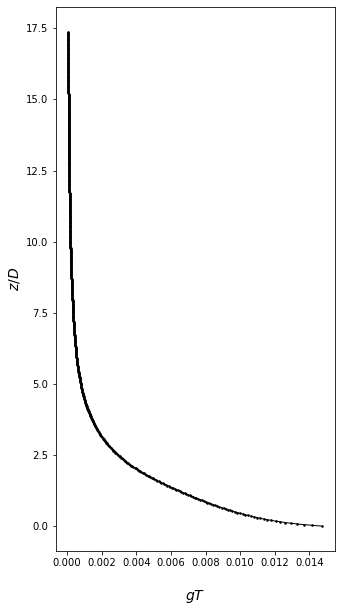

In [25]:
x1 =0 #D
x2 =0 #D
n = 2
title = "Title"
axis = "gT"
plot_plume_spacial_data(Q,x1,x2,n,title,axis,dx,dy,dz,D)

In [7]:
import time
start = time.time()
p1_characteristics = pl.plume_characteristics(W,gT,dx,dy,dz,dt,D,threshold)
stop = time.time()
print(stop-start)

22.208714723587036


In [9]:
import time
start = time.time()
cl = pl.plume_centerline_characteristics(W,gT,dx,dy,dz,dt,D,threshold,v)
stop = time.time()
print(stop-start)

In [10]:
import time
start = time.time()
# p1_polar = pl.plume_polar_coordinates(U,V,W,dx,dy,dz)
stop = time.time()
print(stop-start)

In [16]:
#There will be 5 classes
#Metadata
#PLume Characteristic
#Centerline
#Spacial Data
#Polar Coordinate
#Visuals